In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv')

print(df.head())
print(df.shape)
print(df.info())

         나이        신장        체중  Min_nrs_pod0  Max_nrs_pod0  Avg_nrs_pod0  \
0  0.727273  0.816220  0.203497           0.2           0.8          0.50   
1  0.806818  0.816220  0.169930           0.3           0.2          0.25   
2  0.443182  0.825149  0.132867           0.3           0.7          0.50   
3  0.420455  0.784970  0.259441           0.2           0.4          0.30   
4  0.397727  0.843006  0.250350           0.2           0.7          0.45   

   9_TOTAL_VOL_CUM (mL)  12_TOTAL_VOL_CUM (mL)  24_TOTAL_VOL_CUM (mL)  \
0              0.357496               0.292593               0.220370   
1              0.197694               0.185185               0.129630   
2              0.069193               0.064198               0.032099   
3              0.093904               0.070370               0.035185   
4              0.182867               0.137037               0.072840   

   48_TOTAL_VOL_CUM (mL)  PONV0   성별  수술과  
0                 0.2428    0.0    M   GS  
1         

In [3]:
print(df['Min_nrs_pod0'].value_counts())
print(df['Max_nrs_pod0'].value_counts())
print(df['Avg_nrs_pod0'].value_counts())
print(df['PONV0'].value_counts())

Min_nrs_pod0
0.2    289
0.3    256
0.4    189
0.5    145
0.1    121
0.0     99
0.7     54
0.6     45
0.8     15
0.9      5
1.0      3
Name: count, dtype: int64
Max_nrs_pod0
0.5    198
0.8    150
0.7    150
0.3    150
0.6    134
0.4    122
0.9    100
1.0     98
0.0     60
0.2     44
0.1     15
Name: count, dtype: int64
Avg_nrs_pod0
0.35    123
0.25    121
0.45    116
0.50    106
0.60     93
0.55     93
0.40     88
0.65     79
0.30     67
0.00     59
0.70     54
0.75     52
0.20     49
0.15     37
0.80     28
0.85     15
0.05     13
0.10     10
0.90     10
0.95      5
1.00      3
Name: count, dtype: int64
PONV0
0.0    1045
1.0     130
Name: count, dtype: int64


AttributeError: Rectangle.set() got an unexpected keyword argument 'hist'

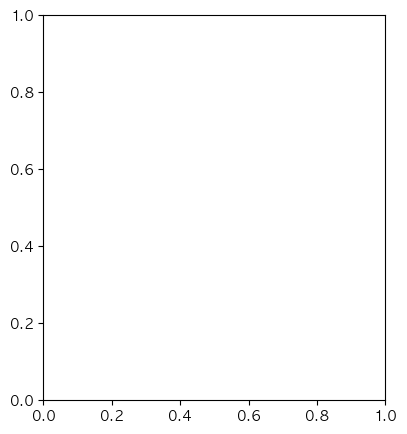

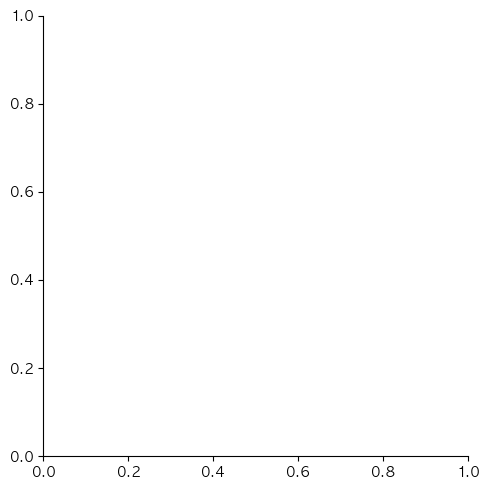

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Mac에서 사용하는 경우, 'AppleGothic' 또는 다른 폰트를 사용)
plt.rc('font', family='AppleGothic')  # Windows는 'Malgun Gothic' 또는 'NanumGothic' 사용 가능
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv')

# 결측값 제거
df = df.dropna(subset=['PONV0'])

# 1. NRS 분포 시각화 (PONV 그룹별)
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0'], 1):
    plt.subplot(1, 3, i)
    for label in df['PONV0'].unique():
        subset = df[df['PONV0'] == label]
        sns.distplot(subset[col], kde=True, hist=True, label=u'PONV={}'.format(label))
    plt.title(u'{} 분포 (PONV=0/1)'.format(col))
    plt.legend()
plt.tight_layout()
plt.show()

# 2. 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0', '나이', '신장', '체중', 'PONV0']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title(u"상관 행렬 히트맵")
plt.show()

# 3. PONV 여부에 따른 NRS 값 박스 플롯
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Min_nrs_pod0', 'Max_nrs_pod0', 'Avg_nrs_pod0'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='PONV0', y=col, data=df, palette='Set2')
    plt.title(u'PONV 여부에 따른 {} 분포'.format(col))
plt.tight_layout()
plt.show()


/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing f

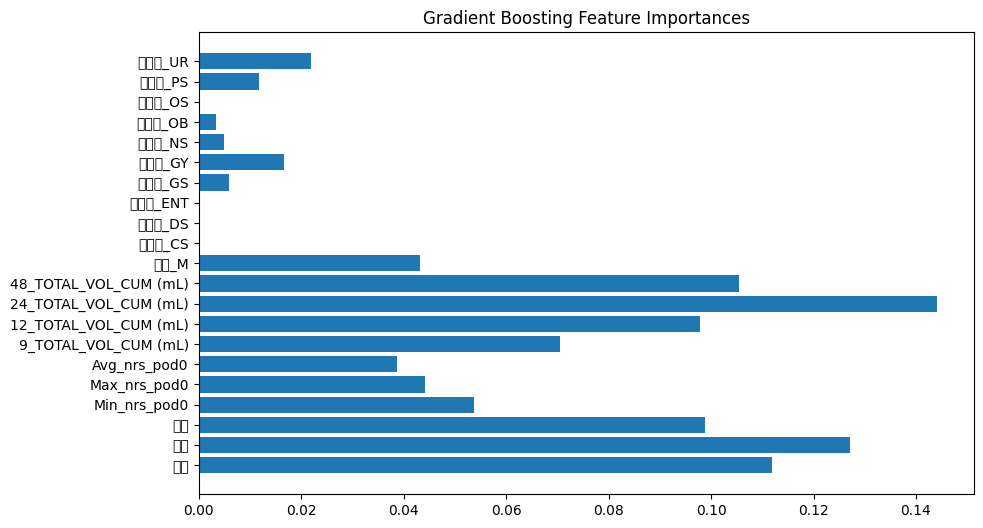

/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jipyeongseon/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing f

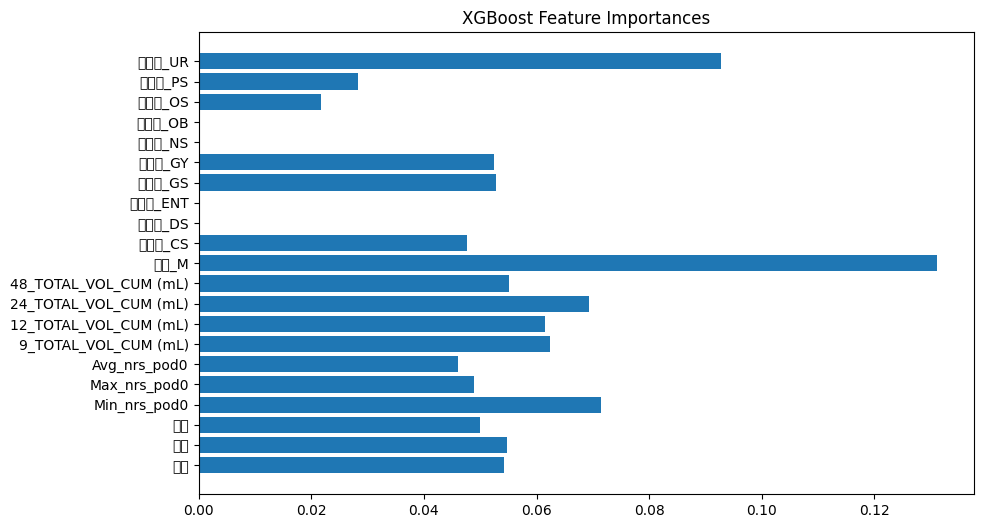

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 1.320092, while the model output was -0.611563. If this difference is acceptable you can set check_additivity=False to disable this check.

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

# 데이터 불러오기 및 전처리
df = pd.read_csv('/Users/jipyeongseon/Desktop/대학원/working.csv', encoding='utf-8')
df = df.dropna(subset=['PONV0'])

# 숫자형 열에 대해 중앙값으로 결측값 채우기
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# 범주형 변수 인코딩
df = pd.get_dummies(df, columns=['성별', '수술과'], drop_first=True)

# 특징(X)과 레이블(y) 선택
X = df.drop('PONV0', axis=1)
y = df['PONV0']

# Gradient Boosting 모델 학습 및 중요도 시각화
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X, y)
gb_importances = gb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.title("Gradient Boosting Feature Importances")
plt.barh(X.columns, gb_importances, align="center")
plt.show()

# XGBoost 모델 학습 및 중요도 시각화
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X, y)
xgb_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.barh(X.columns, xgb_importances, align="center")
plt.show()

# SHAP 분석 - 숫자형 열만 사용
X_numeric = X.select_dtypes(include=['float64', 'int64'])

explainer = shap.Explainer(xgb_model, X_numeric)
shap_values = explainer(X_numeric)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_numeric, plot_type="bar")

# SHAP Dependence Plot for a specific feature (예: 'Avg_nrs_pod0')
plt.figure(figsize=(10, 6))
shap.dependence_plot("Avg_nrs_pod0", shap_values.values, X_numeric)
